# ML1 Final Project: F1 Race Finish Prediction
**Work by LT 2**

---

## Background
F1 is one of the most prestigious motorsports competitions in the world where 20 drivers from 10 different teams race against each other at speeds reaching 370kph throughout the year to determine who is the best driver and which team is the best in terms of car performance, strategy, etc. 

In the motorsports industry, F1 earned $3.65 billion in revenue in 2024 (+25% vs previous year) with unprecedented market growth in sports. The revenue comes from race promotion fees, media rights, sponsorships, and other sources such as high-margin hospitality, support series, and merchandise. Out of all these revenue streams, media rights contribute the most in annual revenue (32.8%) in the form of lucrative broadcasting agreements with major global networks and digital streaming services in partnership with Netflix’s Drive to Survive series. Additionally, much like many other globally-renowned sports, it is also closely tied to the booming sports-betting industry.

In a sport where milliseconds matter, telemetry is the backbone that enables modern F1 teams to extract maximum performance from both the car and the driver. Telemetry is essential in Formula 1 because it provides real-time data from hundreds of sensors across the car, allowing teams to understand performance, optimize setups, coach drivers, make strategic race decisions, and prevent mechanical failures. This continuous stream of information from tire temperatures and brake pressures to fuel flow, hybrid deployment, and steering inputs—helps engineers identify where time is gained or lost, compare drivers, plan pit stops, and detect reliability issues before they become dangerous.

## Motivation

With these figures in mind, the teams stand to gain a lot from determining whether a driver and their car are performing well or poorly, which would allow them to make the necessary adjustments as early as at the end of practice sessions or catch mechanical issues. Whether it's an F1 team or simply a bettor or a spectator, the goal is ultimately to win the championship.

This study was also inspired by the work of Katelyn Castillo, Christopher Nash Jasmin, Jhedson Angelo Petilo, and Louie Sangalang from the MSDS 2025 cohort whose final project for DMW1 last year generated a driver performance index, which quantifies the performance of F1 drivers. The team wanted to include other factors that influence race results such as car/team performance and track difficulty as a way of continuing their work. This section was included specifically to acknowledge the contribution of Kate and Nash's team to the current study. 

## Objective

The group set out to train a machine learning model to predict whether a driver-car duo would get a podium finish (1st-3rd place) or not based on driver performance, car/team performance, and track difficulty, which are all quantified by various features.

## Dataset Information

In order to train machine learning models to predict F1 race finishes, data was collected from 3 different sources namely: FastF1/Ergast API, F1 Official Website, and Kaggle. The FastF1 python package facilitates webscraping through the FastF1 API and Ergast API for data such as telemetry, lap times, race results, etc. As for the F1 Official Website, data pertaining to historical constructor's points and driver points were collected from here. Lastly, historical data about race track incidents and reasons for the incidents were collected from Kaggle. Once data from the 3 sources were collected, these were consolidated for analysis and modelling.


## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from math import ceil
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import time
from sklearn.model_selection import KFold
import seaborn as sns
# from sklearn.model_selection import train_test_split

In [3]:

# # !pip install pandas numpy matplotlib plotly scikit-learn seaborn
# !pip install mord 
# !pip uninstall jupyter jupyterlab -y
# !pip uninstall ipykernel -y
# !pip install ipykernel
# !python -m ipykernel install --user --name .F1_venv --display-name "F1_venv"
# !pip install numpy pandas matplotlib seaborn plotly scikit-learn scipy xgboost lightgbm pyswarms scikit-optimize mord


# LOAD AND PREPARE DATA

The dataset is comprised of 726 entries (individual driver results) for 9 drivers who have been driving consistently since 2020 up until the present. All in all there is a total of 40 columns(features) that each describe the individual driver results. The following are brief descriptions of each feature:

- **Timestamp**: Time and date when data was scraped.
- **driver_code**: 3-letter abbreviation of a driver's last name
- **Consistency_Race**: Floating point number quantifying consistency of a driver in the actual race
- **Style_Race**: Floating point number quantifying the driving style of a driver in the actual race
- **Technical_Race**: Floating point number quantifying the technical execution of a driver in the actual race
- **Pace_Race**: Floating point number quantifying the pace of a driver in the actual race
- **PerformanceIndex_Race**: Floating point number quantifying the overall performance of a driver based on consistency, driving style, technical execution, and pace in the actual race
- **Consistency_Qual**: Floating point number quantifying consistency of a driver in qualifying
- **Style_Qual**: Floating point number quantifying the driving style of a driver in qualifying
- **Technical_Qual**: Floating point number quantifying the technical execution of a driver in qualifying
- **Pace_Qual**: Floating point number quantifying the pace of a driver in qualifying
- **PerformanceIndex_Qual**: Floating point number quantifying the overall performance of a driver based on consistency, driving style, technical execution, and pace in qualifying
- **GrandPrix**: Name of the grand prix(race) typically associated to where the race took place
- **Round**: Race number for the year
- **year**: Year when the race took place
- **QualifyingPosition**: Position of the driver after the qualifying session
- **RaceFinishPosition**: Position of the driver after the actual race
- **team**: Team that the driver drove for for that particular race result
- **driver_points**: Total number of points that a driver received in that year
- **team_points**: Total number of points that a team received in that year
- **Laps**: Number of laps in the race
- **Corners**: Number of corners of the track where the race took place **(Target Variable)**
- **Circuit length (km)**: Length of the track in km
- **Race distance (km)**: Total distance covered by a car in a race obtained by multiplying the number of laps with the circuit length 
- **Direction**: Direction of the race (either clockwise or counter-clockwise)
- **Accident**: Total number of accidents in a year in a specific track
- **Collision**: Total number of collisions in a year in a specific track
- **Damage Related**: Total number of damage related incidents in a year in a specific track
- **Finish**: Total number of race finishes in a specific track 
- **Total_Entries**: Total number of race starts in a specific track
- **Finish_pct**: Probability of a finishing the race in a specific track for a given year
- **Accident_pct**: Probability of an accident happening during the race in a specific track for a given year
- **Collision_pct**: Probability of a collision happening during the race in a specific track for a given year
- **Damage Related_pct**: Probability of a damage related incident occurring during the race in a specific track for a given year
- **DNF_pct**: Probability of a DNF occurring during the race in a specific track for a given year
- **Race_Complexity_Score**: Floating point number quantifying the complexity/difficulty of a track
- **Safety_Index**: Floating point number quantifying the safety level of a track
- **mechanical_faults**: Average number of mechanical faults of a specific team per race for a given year
- **avg_stops_per_car_race**: Average number of stops per car of a specific team per race for a given year
- **avg_pitstop_ms**: Average pitstop time in milliseconds of a specific team for a given year

Test Dataset

In [8]:
# Load and clean data
data_raw = pd.read_csv("F1_main_data_v9.csv")
data = data_raw.copy()
# data = data.drop(['physical_condition', 'airbag_deployed', 'ejection'], axis=1)
# Random sample 8,000 rows using seed 1337
# data = data.dropna().reset_index(drop=True)
# data = data.sample(n=25000, random_state=1337)
# data=data.drop(columns=["Timestamp","driver_code","GrandPrix","team","Consistency_Race", "Style_Race",
#                         "Technical_Race","Pace_Race","PerformanceIndex_Race"])
data=data.drop(columns=["Timestamp","driver_code","GrandPrix","Consistency_Race", "Style_Race",
                        "Technical_Race","Pace_Race","PerformanceIndex_Race","driver_points","team_points"])
target = 'RaceFinishPosition'
# print(data.head())
data.head()

,Consistency_Qual,Style_Qual,Technical_Qual,Pace_Qual,PerformanceIndex_Qual,Round,year,QualifyingPosition,RaceFinishPosition,team,...,Finish_pct,Accident_pct,Collision_pct,Damage Related_pct,DNF_pct,Race_Complexity_Score,Safety_Index,mechanical_faults,avg_stops_per_car_race,avg_pitstop_ms
0,0.254063,0.202593,0.403174,0.80,0.414957,12,2025,5,4.0,Ferrari,...,84.415584,3.896104,11.688312,0.0,15.584416,0.491688,0.352468,0.0,1.89162,160011.280215
1,0.000000,0.199975,0.305004,0.75,0.313745,12,2025,6,14.0,Ferrari,...,84.415584,3.896104,11.688312,0.0,15.584416,0.491688,0.352468,0.0,1.89162,160011.280215
2,0.168950,0.500000,0.417430,0.90,0.496595,12,2025,3,1.0,McLaren,...,84.415584,3.896104,11.688312,0.0,15.584416,0.491688,0.352468,0.0,1.89162,160011.280215
3,0.340871,0.202912,0.190251,0.95,0.421008,12,2025,2,2.0,McLaren,...,84.415584,3.896104,11.688312,0.0,15.584416,0.491688,0.352468,0.0,1.89162,160011.280215
4,0.463925,0.792030,0.231651,0.85,0.584402,12,2025,4,10.0,Mercedes,...,84.415584,3.896104,11.688312,0.0,15.584416,0.491688,0.352468,0.0,1.89162,160011.280215


In [7]:
data.shape

(726, 30)

# PROCESS DATA

MODIFIED Race Finish Position as Ordinal Values  
Initially, we explored predicting exact finishing positions (1st, 2nd, 3rd). However, to improve model robustness, we simplified the target variable to a binary classification: Podium vs. No Podium. This approach focuses on the most critical definition of success in motorsport. A podium finish is not merely a statistic; it represents the threshold for significant championship points, media exposure, and sponsor satisfaction. By grouping the top three positions, we mitigate the noise of minor race incidents that might swap a P2 for a P3, allowing the model to capture the broader signal of high-performance competitiveness

In [9]:
# # METHOD 1 What Position ==========================================
# # Converting Race Finish Output to Integer Values
# # data2.loc[:, "RaceFinishPosition"] = data2["RaceFinishPosition"].astype(int)
# data["RaceFinishPosition"] = pd.to_numeric(data["RaceFinishPosition"], errors="coerce").fillna(0).astype(int)


df_display = data.copy()
# METHOD 2 Podium vs No Podium ==========================================
# Convert to numeric safely
data["RaceFinishPosition"] = pd.to_numeric(data["RaceFinishPosition"], errors="coerce")
# Classify: 1 if Podium (positions 1, 2, 3), 0 otherwise
data["RaceFinishPosition"] = np.where(data["RaceFinishPosition"].between(1, 3), 1, 0)

# # METHOD 3 1st place or None ==========================================
# # Convert to numeric safely
# df_display["RaceFinishPosition"] = pd.to_numeric(data["RaceFinishPosition"], errors="coerce")
# # Classify: 1 if Podium (positions 1, 2, 3), 0 otherwise
# df_display["RaceFinishPosition"] = np.where(data["RaceFinishPosition"].between(1, 1), 1, 0)

# df_display["RaceFinishPosition"].head()

# # METHOD 4. 4 Categories. 1st 2nd 3rd and No Podium =========================
# # Convert to numeric safely
# data["RaceFinishPosition"] = pd.to_numeric(data["RaceFinishPosition"], errors="coerce")

# # 4 categories: 1st, 2nd, 3rd, no podium (0)
# df_display["RaceFinishPosition"] = np.select(
#     [
#         data["RaceFinishPosition"] == 1,
#         data["RaceFinishPosition"] == 2,
#         data["RaceFinishPosition"] == 3,
#     ],
#     [1, 2, 3],
#     default=0
# )

# print(data["RaceFinishPosition"].head())

PROPORTIONAL CHANCE CRITERION  
Here we find that the data is imbalanced and that we will need a model accuracy of 74.64% to at least be better than random chance.

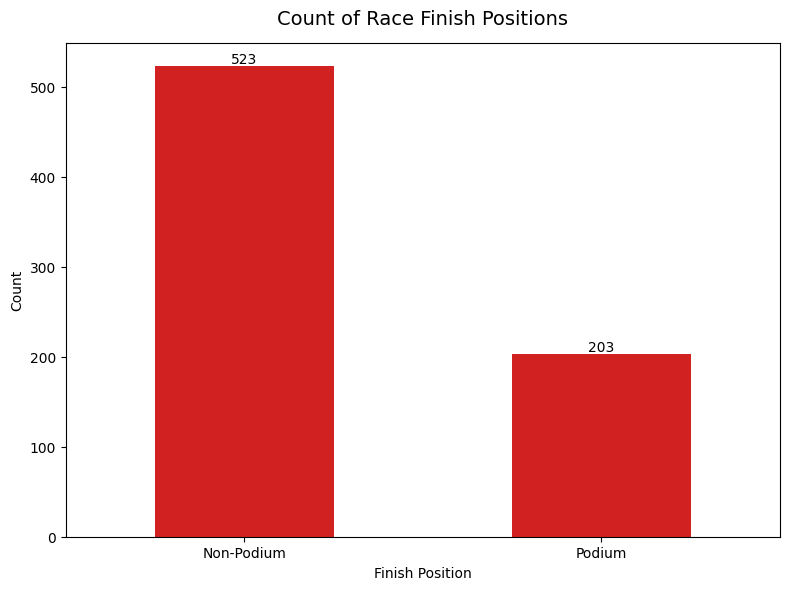

Population per class:
     0
0  523
1  203

Proportion Chance Criterion: 59.71%
1.25 * Proportion Chance Criterion: 74.64%


In [ ]:
from collections import Counter
 
# 1. Count the occurrences (this part was correct)
state_counts = Counter(data[target])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
 
# Sort the DataFrame by the finish position (index) for a predictable plot order
df_state = df_state.sort_index()
 
# 2. Create a mapping from the numeric position to the desired label
label_map = {
    # 4: '1st',
    # 3: '2nd',
    # 2: '3rd',
    1: 'Podium',
    0: 'Non-Podium'
}
 
# 3. Create the plot and capture the Axes object in the 'ax' variable
ax = df_state.plot(kind='bar', figsize=(8, 6), color=["#d22121"])
 
# 4. Use the Axes object to add the bar labels
# ax.containers[0] gets the collection of bars from the plot
ax.bar_label(ax.containers[0], fmt='%d') # fmt='%d' ensures integer labels
 
# 5. Set plot titles and labels using the 'ax' object (good practice)
ax.set_title("Count of Race Finish Positions", y=1.02, fontsize=14)
ax.set_ylabel("Count")
ax.set_xlabel("Finish Position")
 
# 6. Set the x-tick labels dynamically using the map
# This is robust and doesn't depend on a fixed order
ax.set_xticklabels([label_map.get(x, x) for x in df_state.index], rotation=0)
 
# 7. Remove the legend
ax.get_legend().remove()
 
plt.tight_layout() # Adjusts plot to prevent labels from overlapping
plt.show()
 
 
# --- The rest of your code (which was correct) ---
# The column name is 0, which is correct
num = (df_state[0] / df_state[0].sum())**2
 
print("Population per class:\n{}".format(df_state))
print("\nProportion Chance Criterion: {:0.2f}%".format(100 * num.sum()))
print("1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25 * 100 * num.sum()))

Check Numerical and Categorical Columns  

In [11]:
# Identify categorical and numeric columns
cat_cols = data.select_dtypes(include=['object', 'category']).columns
num_cols = data.select_dtypes(exclude=['object', 'category']).columns

print("Numeric columns:", num_cols.tolist())
print("Categorical columns:", cat_cols.tolist())

# --- Check for missing values ---
missing_info = data.isna().sum()  # count NaN per column
missing_info = missing_info[missing_info > 0]  # only show columns with NaN

if not missing_info.empty:
    print("\n🧩 Columns with missing values:")
    print(missing_info.sort_values(ascending=False))
else:
    print("\n✅ No missing values found in the dataset!")

# Fill all numeric columns with their mean
data[num_cols] = data[num_cols].apply(lambda x: x.fillna(x.mean()))

# (Optional) For categorical columns, you can fill NaN with a placeholder
data[cat_cols] = data[cat_cols].fillna("Unknown")

# Verify if any NaN remain
print("\nRemaining missing values after mean imputation:")
print(data.isna().sum()[data.isna().sum() > 0])



Numeric columns: ['Consistency_Qual', 'Style_Qual', 'Technical_Qual', 'Pace_Qual', 'PerformanceIndex_Qual', 'Round', 'year', 'QualifyingPosition', 'RaceFinishPosition', 'Laps', 'Corners', 'Circuit length (km)', 'Race distance (km)', 'Accident', 'Collision', 'Damage Related', 'Finish', 'Total_Entries', 'Finish_pct', 'Accident_pct', 'Collision_pct', 'Damage Related_pct', 'DNF_pct', 'Race_Complexity_Score', 'Safety_Index', 'mechanical_faults', 'avg_stops_per_car_race', 'avg_pitstop_ms']
Categorical columns: ['team', 'Direction']

🧩 Columns with missing values:
PerformanceIndex_Qual    2
Consistency_Qual         1
Style_Qual               1
dtype: int64

Remaining missing values after mean imputation:
Series([], dtype: int64)


One Hot Encoding

In [14]:
X = data.drop(columns=[target])
y = data[target]

# Separate categorical and numeric columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns
num_cols = X.select_dtypes(exclude=['object', 'category']).columns.tolist()

# Only build encoder if categorical columns exist
if len(cat_cols) > 0:
    ohe = OneHotEncoder(
        handle_unknown='infrequent_if_exist',
        min_frequency=0.01,   # ~1% threshold for infrequent categories
        sparse_output=False,
        dtype=int              # ensures 0/1 not True/False
    )

    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', ohe, cat_cols),
            ('num', 'passthrough', num_cols)
        ],
        remainder='drop'
    )

    # ⚠️ Use fit_transform only the first time
    X_encoded = preprocessor.fit_transform(X)
    feature_names = preprocessor.get_feature_names_out()
else:
    X_encoded = X.values
    feature_names = X.columns

data2 = pd.DataFrame(X_encoded, columns=feature_names)

# Attach target
data2 = pd.concat([data2, y.reset_index(drop=True)], axis=1)
data2.head()

,cat__team_Alpine Renault,cat__team_Aston Martin Aramco Mercedes,cat__team_Ferrari,cat__team_McLaren,cat__team_McLaren Mercedes,cat__team_McLaren Renault,cat__team_Mercedes,cat__team_Red Bull Racing,cat__team_Red Bull Racing Honda,cat__team_Red Bull Racing Honda RBPT,...,num__Accident_pct,num__Collision_pct,num__Damage Related_pct,num__DNF_pct,num__Race_Complexity_Score,num__Safety_Index,num__mechanical_faults,num__avg_stops_per_car_race,num__avg_pitstop_ms,RaceFinishPosition
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.896104,11.688312,0.0,15.584416,0.491688,0.352468,0.0,1.89162,160011.280215,0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.896104,11.688312,0.0,15.584416,0.491688,0.352468,0.0,1.89162,160011.280215,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.896104,11.688312,0.0,15.584416,0.491688,0.352468,0.0,1.89162,160011.280215,1
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.896104,11.688312,0.0,15.584416,0.491688,0.352468,0.0,1.89162,160011.280215,1
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.896104,11.688312,0.0,15.584416,0.491688,0.352468,0.0,1.89162,160011.280215,0


# SPLIT TRAIN, VAIDATION, TEST

### SELECT TEST DATA

METHOD  
Future Predicting 2025 Data. All races during 2025 will be used as the test data whereas the model will be trained on 2020 to 2024 data.

In [16]:
data2.head()

,cat__team_Alpine Renault,cat__team_Aston Martin Aramco Mercedes,cat__team_Ferrari,cat__team_McLaren,cat__team_McLaren Mercedes,cat__team_McLaren Renault,cat__team_Mercedes,cat__team_Red Bull Racing,cat__team_Red Bull Racing Honda,cat__team_Red Bull Racing Honda RBPT,...,num__Accident_pct,num__Collision_pct,num__Damage Related_pct,num__DNF_pct,num__Race_Complexity_Score,num__Safety_Index,num__mechanical_faults,num__avg_stops_per_car_race,num__avg_pitstop_ms,RaceFinishPosition
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.896104,11.688312,0.0,15.584416,0.491688,0.352468,0.0,1.89162,160011.280215,0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.896104,11.688312,0.0,15.584416,0.491688,0.352468,0.0,1.89162,160011.280215,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.896104,11.688312,0.0,15.584416,0.491688,0.352468,0.0,1.89162,160011.280215,1
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.896104,11.688312,0.0,15.584416,0.491688,0.352468,0.0,1.89162,160011.280215,1
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.896104,11.688312,0.0,15.584416,0.491688,0.352468,0.0,1.89162,160011.280215,0


In [17]:
# ✅ Split dataset by year
train_val_data = data2[data2["num__year"] < 2025].copy()    # all years before 2025
data_2025 = data2[data2["num__year"] == 2025].copy()        # only 2025 data

# --- Control what % of 2025 data to use for test ---
test_fraction = 0.99 # 👈 set this to the % (e.g., 0.3 = 30%, 0.5 = 50%)

data_2025_train, data_2025_test = train_test_split(
    data_2025,
    test_size=test_fraction,
    random_state=42,     # reproducibility
    shuffle=True         # shuffle so random subset of 2025 data
)

# Combine all training data (pre-2025 + part of 2025)
train_val_data = pd.concat([train_val_data, data_2025_train], ignore_index=True)
test_data = data_2025_test.copy()

# Define features and target
X_train_val = train_val_data.drop(columns=[target])
y_train_val = train_val_data[target]

X_test = test_data.drop(columns=[target])
y_test = test_data[target]

# --- Display summary ---
print(f"Training + Validation size: {len(X_train_val)} rows ({len(X_train_val)/len(data2)*100:.1f}%)")
print(f"Test size ({test_fraction*100:.0f}% of 2025 data): {len(X_test)} rows ({len(X_test)/len(data2)*100:.1f}%)")


Training + Validation size: 601 rows (82.8%)
Test size (99% of 2025 data): 125 rows (17.2%)


### SELECT VALIDATION DATA

METHOD  
General method with Sklearn

In [20]:
X = X_train_val.copy()
y = y_train_val.copy()

# --- Step 1: Split into Train (70%) and Temp (30%) ---
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.10,           # 30% for val+test
    random_state=42,         # reproducibility
    stratify=None            # set to y if classification
)

print(f"Train and Val size: {len(X_train)} rows ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test size: {len(X_val)} rows ({len(X_val)/len(X)*100:.1f}%)")

Train and Val size: 540 rows (89.9%)
Test size: 61 rows (10.1%)


# ML MODELLING

Default Settings. Single Run. No Hyperparameter Tuning.  
Here we first try running the data through multiple models using their default setting to get an initial look on the likelihood of what model to use to expand and refine our results on.

Ordinal Logistic Regression A specialized regression model adapted for ranked data that respects the natural order of the target variable (e.g., 1st vs. 2nd place), rather than treating classes as independent.

Logistic Regression The standard baseline algorithm that fits a linear S-curve to the data, providing a simple reference point for binary classification with high interpretability.

kNN (k-Nearest Neighbors) A distance-based method that classifies a new data point by looking at the majority vote of its closest neighbors in the feature space, rather than learning a complex model structure.

Random Forest is a robust ensemble method that aggregates predictions from hundreds of independent decision trees built in parallel to reduce variance and prevent overfitting.

Gradient Boosting A sequential ensemble technique where each new tree is built specifically to correct the errors made by the previous trees, prioritizing high accuracy on difficult cases.

XGBoost is an optimized, high-performance version of gradient boosting that uses regularization to control complexity and executes much faster than standard implementations.

LightGBM is a highly efficient gradient boosting framework that prioritizes speed and low memory usage by growing trees vertically (leaf-wise) rather than horizontally.

Support Vector Machine (SVM) is a geometric classifier that separates classes by finding the optimal hyperplane that maximizes the margin or "gap" between data points in high-dimensional space.

In [21]:
# --- imports ---
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline
import pandas as pd

# NEW: import an ordinal classifier
# !pip install mord --quiet
import mord as m  # Mord implements ordinal logistic regression (LogisticIT, OrdinalRidge, etc.)

# --- define models (pipelines where scaling helps) ---
pipe_lr  = make_pipeline(MinMaxScaler(), LogisticRegression(max_iter=10000))
pipe_knn = make_pipeline(MinMaxScaler(), KNeighborsClassifier())
pipe_svm = make_pipeline(MinMaxScaler(), SVC())
pipe_nb  = make_pipeline(MinMaxScaler(), GaussianNB())

DT  = DecisionTreeClassifier()
RF  = RandomForestClassifier()
GBM = GradientBoostingClassifier()
LGB = LGBMClassifier(verbose=-1)

# NEW: Ordinal Logistic Regression model (LogisticIT)
ORD = make_pipeline(MinMaxScaler(), m.LogisticIT())  # cumulative link model

# --- XGBoost requires encoded y ---
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc   = le.transform(y_val)
y_test_enc  = le.transform(y_test)
XGB = xgb.XGBClassifier(verbosity=0, eval_metric='mlogloss')

# --- fit on X_train/y_train ---
ORD.fit(X_train, y_train)
pipe_lr.fit(X_train, y_train)
pipe_knn.fit(X_train, y_train)
pipe_svm.fit(X_train, y_train)
pipe_nb.fit(X_train, y_train)

DT.fit(X_train, y_train)
RF.fit(X_train, y_train)
GBM.fit(X_train, y_train)
LGB.fit(X_train, y_train)
XGB.fit(X_train, y_train_enc)

# --- evaluate models ---
round_val = 5
cols = ['Machine Learning Classification Method', 'Train Accuracy', 'Validation Accuracy']
df_result = pd.DataFrame(columns=cols)

df_result.loc[0] = ['Ordinal Logistic Regression (mord)', round(ORD.score(X_train, y_train), round_val), round(ORD.score(X_val, y_val), round_val)]
df_result.loc[1] = ['Logistic Regression', round(pipe_lr.score(X_train, y_train), round_val), round(pipe_lr.score(X_val, y_val), round_val)]
df_result.loc[2] = ['kNN', round(pipe_knn.score(X_train, y_train), round_val), round(pipe_knn.score(X_val, y_val), round_val)]
# df_result.loc[3] = ['Decision Tree', round(DT.score(X_train, y_train), round_val), round(DT.score(X_val, y_val), round_val)]
df_result.loc[4] = ['Random Forest', round(RF.score(X_train, y_train), round_val), round(RF.score(X_val, y_val), round_val)]
df_result.loc[5] = ['Gradient Boosting', round(GBM.score(X_train, y_train), round_val), round(GBM.score(X_val, y_val), round_val)]
df_result.loc[6] = ['XGBoost', round(XGB.score(X_train, y_train_enc), round_val), round(XGB.score(X_val, y_val_enc), round_val)]
df_result.loc[7] = ['LightGBM', round(LGB.score(X_train, y_train), round_val), round(LGB.score(X_val, y_val), round_val)]
df_result.loc[8] = ['Support Vector Machine', round(pipe_svm.score(X_train, y_train), round_val), round(pipe_svm.score(X_val, y_val), round_val)]
# df_result.loc[9] = ['Naive Bayes', round(pipe_nb.score(X_train, y_train), round_val), round(pipe_nb.score(X_val, y_val), round_val)]

df_result = df_result.sort_values(by='Validation Accuracy', ascending=False)
df_result


,Machine Learning Classification Method,Train Accuracy,Validation Accuracy
4,Random Forest,1.00000,0.86885
0,Ordinal Logistic Regression (mord),0.84259,0.83607
1,Logistic Regression,0.84074,0.83607
5,Gradient Boosting,0.97222,0.83607
7,LightGBM,1.00000,0.83607
2,kNN,0.84074,0.81967
6,XGBoost,1.00000,0.81967
8,Support Vector Machine,0.84630,0.81967


ML Modelling: Single Run. Combining with Test Data  
We now try to run the results on 2025 race data to observe how well our model can predict future races. Here we see Random Forest performing the best with just the default parameters.

In [22]:
# table
cols = ['Machine Learning Classification Method','Train Accuracy','Validation Accuracy','Test Accuracy']
df_result2 = pd.DataFrame(columns=cols)
round_val = 8
df_result2.loc[0] = ['Logistic Regression', round(pipe_lr.score(X_train,y_train),round_val), round(pipe_lr.score(X_val,y_val),round_val), round(pipe_lr.score(X_test,y_test),round_val)]
df_result2.loc[1] = ['kNN', round(pipe_knn.score(X_train,y_train),round_val), round(pipe_knn.score(X_val,y_val),round_val), round(pipe_knn.score(X_test,y_test),round_val)]
# df_result2.loc[2] = ['Decision Tree', round(DT.score(X_train,y_train),round_val), round(DT.score(X_val,y_val),round_val), round(DT.score(X_test,y_test),round_val)]
df_result2.loc[3] = ['Random Forest', round(RF.score(X_train,y_train),round_val), round(RF.score(X_val,y_val),round_val), round(RF.score(X_test,y_test),round_val)]
df_result2.loc[4] = ['Gradient Boosting', round(GBM.score(X_train,y_train),round_val), round(GBM.score(X_val,y_val),round_val), round(GBM.score(X_test,y_test),round_val)]
df_result2.loc[5] = ['XGBoost', round(XGB.score(X_train,y_train_enc),round_val), round(XGB.score(X_val,y_val_enc),round_val), round(XGB.score(X_test,y_test_enc),round_val)]
df_result2.loc[6] = ['LightGBM', round(LGB.score(X_train,y_train),round_val), round(LGB.score(X_val,y_val),round_val), round(LGB.score(X_test,y_test),round_val)]
df_result2.loc[7] = ['Support Vector Machine', round(pipe_svm.score(X_train,y_train),round_val), round(pipe_svm.score(X_val,y_val),round_val), round(pipe_svm.score(X_test,y_test),round_val)]
# df_result2.loc[8] = ['Naive Bayes', round(pipe_nb.score(X_train,y_train),round_val), round(pipe_nb.score(X_val,y_val),round_val), round(pipe_nb.score(X_test,y_test),round_val)]

df_result2 = df_result2.sort_values(by='Validation Accuracy', ascending=False)
df_result2

,Machine Learning Classification Method,Train Accuracy,Validation Accuracy,Test Accuracy
3,Random Forest,1.000000,0.868852,0.808
0,Logistic Regression,0.840741,0.836066,0.744
4,Gradient Boosting,0.972222,0.836066,0.736
6,LightGBM,1.000000,0.836066,0.768
1,kNN,0.840741,0.819672,0.720
5,XGBoost,1.000000,0.819672,0.784
7,Support Vector Machine,0.846296,0.819672,0.680


# HYPERPARMETER TUNING THE MODELS  

ALL MODELS  
We constructed a machine learning pipeline utilizing Stratified K-Fold Cross Validation to ensure representative sampling across our imbalanced dataset. While we initially considered Monte Carlo simulations combined with Grid Search, we ultimately selected Bayesian Optimization. This approach allows us to efficiently navigate a broader hyperparameter space and utilizes contour plots to visualize and pinpoint high-likelihood regions for optimal parameters.

In [26]:
# ============================================================
# 🏎️ Machine Learning Training Framework with Ordinal + Test Eval
# ============================================================

import time
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import StratifiedKFold
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical, Real
from skopt.callbacks import DeadlineStopper

# === Classifiers ===
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
import xgboost as xgb
import mord as m
import ast

# ============================================================
# === Configuration ===
# ============================================================

# cv = KFold(n_splits=3, shuffle=True, random_state=42)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# ============================================================
# === Helper functions ===
# ============================================================

def _final_estimator(est):
    """Return final estimator from pipeline or model."""
    return list(est.named_steps.values())[-1] if hasattr(est, "named_steps") else est

def _top_feature(estimator, X):
    """Return most important feature based on coefficients or importances."""
    est = _final_estimator(estimator)
    try:
        if hasattr(est, "feature_importances_"):
            idx = int(np.argmax(est.feature_importances_))
            return X.columns[idx]
        if hasattr(est, "coef_"):
            coef = np.asarray(est.coef_)
            if coef.ndim > 1:
                coef = np.mean(np.abs(coef), axis=0)
            idx = int(np.argmax(np.abs(coef)))
            return X.columns[idx]
    except Exception:
        pass
    return "NA"

# ============================================================
# === Core Training Function Template ===
# ============================================================

def _train_model(model_name, model, search_space, X, y, X_test, y_test):
    """Unified function for BayesSearchCV + test evaluation."""
    t0 = time.time()

    # Mord models skip BayesSearchCV since no params to tune
    if model_name == "Ordinal Logistic Regression (mord)":
        scores = cross_val_score(model, X, y, cv=cv, scoring="accuracy", n_jobs=-1)
        model.fit(X, y)
        test_score = model.score(X_test, y_test)
        return [
            model_name,
            scores.mean(),
            "{}",
            _top_feature(model, X),
            test_score,
            time.time() - t0,
        ]

    # Standard models with BayesSearchCV
    bayes = BayesSearchCV(model, search_space, n_iter=40, scoring="accuracy",
                          cv=cv, n_jobs=-1, random_state=42, verbose=0)
    bayes.fit(X, y)

    # Evaluate best model on test data
    best_model = bayes.best_estimator_
    test_score = best_model.score(X_test, y_test)

    return [
        model_name,
        bayes.best_score_,
        str(bayes.best_params_),
        _top_feature(best_model, X),
        test_score,
        time.time() - t0,
    ]

# ============================================================
# === Individual Model Functions ===
# ============================================================

def train_ordinal(X, y, X_test, y_test):
    model = make_pipeline(MinMaxScaler(), m.LogisticIT())
    return _train_model("Ordinal Logistic Regression (mord)", model, {}, X, y, X_test, y_test)

def train_logreg(X, y, X_test, y_test):
    pipe = make_pipeline(MinMaxScaler(), LogisticRegression(max_iter=10000))
    search = {
        "logisticregression__C": Real(1e-3, 1e3, prior="log-uniform"),
        "logisticregression__penalty": Categorical(["l2", "l1"]),
        "logisticregression__solver": Categorical(["liblinear", "saga"]),
    }
    return _train_model("Logistic Regression", pipe, search, X, y, X_test, y_test)

def train_knn(X, y, X_test, y_test):
    pipe = make_pipeline(MinMaxScaler(), KNeighborsClassifier())
    search = {
        "kneighborsclassifier__n_neighbors": Integer(1, 50),
        "kneighborsclassifier__weights": Categorical(["uniform", "distance"]),
        "kneighborsclassifier__p": Categorical([1, 2]),
    }
    return _train_model("kNN", pipe, search, X, y, X_test, y_test)

def train_dt(X, y, X_test, y_test):
    model = DecisionTreeClassifier(random_state=42)
    search = {
        "max_depth": Integer(2, 50),
        "min_samples_split": Integer(2, 20),
        "min_samples_leaf": Integer(1, 20),
        "max_features": Categorical([None, "sqrt", "log2"]),
    }
    return _train_model("Decision Tree", model, search, X, y, X_test, y_test)

def train_rf(X, y, X_test, y_test):
    model = RandomForestClassifier(random_state=42, n_jobs=-1)
    search = {
        "n_estimators": Integer(80, 200),
        "max_depth": Integer(2, 20),
        "max_features": Categorical(["sqrt", "log2"]),
        "bootstrap": Categorical([True, False]),
        
    }
    return _train_model("Random Forest", model, search, X, y, X_test, y_test)

def train_gbm(X, y, X_test, y_test):
    model = GradientBoostingClassifier(random_state=42)
    search = {
        "n_estimators": Integer(80, 200),
        "learning_rate": Real(1e-2, 0.3, prior="log-uniform"),
        "max_depth": Integer(2, 6),
        "subsample": Real(0.5, 1.0),
    }
    return _train_model("Gradient Boosting", model, search, X, y, X_test, y_test)

def train_xgb(X, y, X_test, y_test):
    model = xgb.XGBClassifier(random_state=42, nthread=-1, tree_method="hist",
                              use_label_encoder=False, eval_metric="logloss")
    search = {
        "n_estimators": Integer(100, 1000),
        "learning_rate": Real(1e-3, 0.3, prior="log-uniform"),
        "max_depth": Integer(2, 10),
        "subsample": Real(0.5, 1.0),
        "colsample_bytree": Real(0.5, 1.0),
        "reg_lambda": Real(1e-3, 15.0, prior="log-uniform"),
        "reg_alpha": Real(1e-6, 1.0, prior="log-uniform"),
    }
    return _train_model("XGBoost", model, search, X, y, X_test, y_test)

def train_lgb(X, y, X_test, y_test):
    model = LGBMClassifier(random_state=42, n_jobs=-1)
    search = {
        "n_estimators": Integer(200, 1200),
        "learning_rate": Real(1e-3, 0.3, prior="log-uniform"),
        "max_depth": Integer(-1, 50),
        "num_leaves": Integer(15, 255),
        "subsample": Real(0.5, 1.0),
    }
    return _train_model("LightGBM", model, search, X, y, X_test, y_test)

def train_svm(X, y, X_test, y_test):
    pipe = make_pipeline(MinMaxScaler(), SVC())
    search = {
        "svc__C": Real(1e-3, 1e3, prior="log-uniform"),
        "svc__kernel": Categorical(["linear", "rbf", "poly"]),
    }
    return _train_model("SVM", pipe, search, X, y, X_test, y_test)

def train_nb(X, y, X_test, y_test):
    model = GaussianNB()
    t0 = time.time()
    scores = cross_val_score(model, X, y, cv=cv, scoring="accuracy", n_jobs=-1)
    model.fit(X, y)
    test_score = model.score(X_test, y_test)
    return [
        "Naive Bayes",
        scores.mean(),
        "{}",
        _top_feature(model, X),
        test_score,
        time.time() - t0,
    ]

In [24]:
# ==========================================
# Run Classification Models
# ==========================================
results = []

# Ordinal Logistic Regression
results.append(train_ordinal(X_train_val, y_train_val, X_test, y_test))
print("✅ done - Ordinal Logistic Regression")

# Logistic Regression
results.append(train_logreg(X_train_val, y_train_val, X_test, y_test))
print("✅ done - Logistic Regression")

# kNN
results.append(train_knn(X_train_val, y_train_val, X_test, y_test))
print("✅ done - kNN")

# # Decision Tree
# results.append(train_dt(X_train_val, y_train_val, X_test, y_test))
# print("✅ done - Decision Tree")


# Random Forest
results.append(train_rf(X_train_val, y_train_val, X_test, y_test))
print("✅ done - Random Forest")

results.append(train_rf(X_train_val, y_train_val, X_test, y_test))
print("✅ done - Random Forest")


# Gradient Boosting
results.append(train_gbm(X_train_val, y_train_val, X_test, y_test))
print("✅ done - Gradient Boosting")

# XGBoost: encode y only for XGB
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_val_enc = le.fit_transform(y_train_val)
y_test_enc = le.transform(y_test)

results.append(train_xgb(X_train_val, y_train_val_enc, X_test, y_test_enc))
print("✅ done - XGBoost")


# LightGBM
results.append(train_lgb(X_train_val, y_train_val, X_test, y_test))
print("✅ done - LightGBM")

# Support Vector Machine
results.append(train_svm(X_train_val, y_train_val, X_test, y_test))
print("✅ done - SVM")

# Naive Bayes
# results.append(train_nb(X_train_val, y_train_val, X_test, y_test))
# print("✅ done - Naive Bayes")


✅ done - Ordinal Logistic Regression
✅ done - Logistic Regression
✅ done - kNN
✅ done - Random Forest
✅ done - Random Forest
✅ done - Gradient Boosting


c:\Enzo_Files\AIM Data Science\AIM_Sharing\.F1_venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:03:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ done - XGBoost
✅ done - LightGBM
✅ done - SVM


In [28]:

# ==========================================
# Combine and Display Results
# ==========================================
df = pd.DataFrame(
    results,
    columns=['Model', 'CV Accuracy', 'Best Params', 'Top Feature', 'Test Accuracy', 'Runtime (s)']
)

# Sort by best CV Accuracy
df = df.sort_values('CV Accuracy', ascending=False).reset_index(drop=True)

print("\n=== Final Model Performance Summary ===")
display(df)



=== Final Model Performance Summary ===


,Model,CV Accuracy,Best Params,Top Feature,Test Accuracy,Runtime (s)
0,Gradient Boosting,0.843574,OrderedDict({'learning_rate': 0.01523668956004...,num__Pace_Qual,0.808,24.216643
1,LightGBM,0.836940,OrderedDict({'learning_rate': 0.00102092234948...,num__Pace_Qual,0.800,94.736805
2,XGBoost,0.836932,"OrderedDict({'colsample_bytree': 0.5, 'learnin...",num__Pace_Qual,0.800,33.296232
3,Random Forest,0.831907,"OrderedDict({'bootstrap': True, 'max_depth': 9...",num__Pace_Qual,0.816,23.280609
4,Random Forest,0.831907,"OrderedDict({'bootstrap': True, 'max_depth': 9...",num__Pace_Qual,0.816,25.869178
5,Logistic Regression,0.825265,OrderedDict({'logisticregression__C': 0.433629...,num__Pace_Qual,0.784,24.043515
6,SVM,0.815299,"OrderedDict({'svc__C': 0.28881766539144715, 's...",NA,0.776,18.460191
7,Ordinal Logistic Regression (mord),0.801965,{},num__Pace_Qual,0.744,1.598415
8,kNN,0.778740,OrderedDict({'kneighborsclassifier__n_neighbor...,NA,0.704,10.990299


### REFINED HYPERSPACE PARAMETER  
Based on preliminary results, we downselected to the three most promising candidate models: Random Forest, Gradient Boosting, and XGBoost. To maximize test accuracy, we are now performing exploratory hyperparameter fine-tuning. This involved expanding the parameter search space, increasing the number of cross-validation folds for robustness, and raising the Bayesian Search iteration count to ensure convergence on the optimal setting. We observed contourplots of the parameters tested to determine how to tune the search space settings. **Our Final Model shows Random Forest with the highest test accuracy of ~85% compared to the 3 other models.**

REFINED HYPERSPACE PARAMETER MODELLING: RANDOM FOREST

In [29]:
# ============================================================
# === Configuration ===
# ============================================================
from sklearn.ensemble import RandomForestClassifier
from skopt.space import Real, Integer, Categorical # Ensuring these are imported

pd.options.display.float_format = '{:.3f}'.format
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ============================================================
# === Start Random Forest Training
# ============================================================

print("🚀 Starting Random Forest training...")
t0 = time.time()

# Pipeline: Swapped GradientBoosting for RandomForest
pipe = make_pipeline(MinMaxScaler(), RandomForestClassifier(random_state=42))

# Search Space: Adjusted for Random Forest specific params
# Note: 'learning_rate' is removed. 'max_features' is added.
search = {
    # Default is 100. We search a tighter range around it (50-200).
    "randomforestclassifier__n_estimators": Integer(50, 200),

    # Default is None (unlimited). 
    # We allow deeper trees (up to 50) to simulate the default behavior of growing fully.
    "randomforestclassifier__max_depth": Integer(10, 50),

    # Default is 2. We keep the range low (2-10) to avoid underfitting.
    "randomforestclassifier__min_samples_split": Integer(2, 10),

    # Default is 1. We keep this very low (1-4) to preserve the detailed trees of a standard RF.
    "randomforestclassifier__min_samples_leaf": Integer(1, 4),

    # Default is 'sqrt'. We remove 'None' (which uses all features) to stick to standard RF behavior.
    "randomforestclassifier__max_features": Categorical(['sqrt', 'log2']),
    
    # Default is True.
    "randomforestclassifier__bootstrap": Categorical([True, False])
}

# Run Bayesian Optimization
bayes = BayesSearchCV(
    pipe,
    search,
    n_iter=60,
    scoring="accuracy",
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=0
)

# Fit the model
bayes.fit(X_train_val, y_train_val)
best_model = bayes.best_estimator_

# ============================================================
# === Predictions and Test Accuracy
# ============================================================

y_pred = best_model.predict(X_test)
test_score = best_model.score(X_test, y_test)
runtime = round(time.time() - t0, 3)

# ============================================================
# === Extract Top 10 Features (Inline)
# ============================================================

est = list(best_model.named_steps.values())[-1] if hasattr(best_model, "named_steps") else best_model
top_features = "N/A"

try:
    if hasattr(est, "feature_importances_"):
        importances = np.asarray(est.feature_importances_)
        top_idx = np.argsort(importances)[::-1][:10]
        top_features = ", ".join([f"{X_train_val.columns[i]} ({importances[i]:.3f})" for i in top_idx])
    elif hasattr(est, "coef_"):
        coef = np.asarray(est.coef_)
        if coef.ndim > 1:
            coef = np.mean(np.abs(coef), axis=0)
        top_idx = np.argsort(np.abs(coef))[::-1][:10]
        top_features = ", ".join([f"{X_train_val.columns[i]} ({coef[i]:.3f})" for i in top_idx])
except Exception:
    top_features = "N/A"

# ============================================================
# === Build Summary DataFrame
# ============================================================

result = {
    "Model": "Random Forest",
    "CV Accuracy": round(bayes.best_score_, 3),
    "Best Params": bayes.best_params_,
    "Top 10 Features": top_features,
    "Test Accuracy": round(test_score, 3),
    "Runtime (s)": runtime,
}

df = pd.DataFrame([result])
print("\n=== Final Model Performance Summary ===")
display(df)

# ============================================================
# === Visualization of Search Space
# ============================================================

results_df = pd.DataFrame(bayes.cv_results_)
param_cols = [c for c in results_df.columns if c.startswith('param_')]
results_df = results_df.rename(columns={'mean_test_score': 'CV_Accuracy'})

# ============================================================
# === Show Predictions
# ============================================================

test_results = X_test.copy()
test_results["Actual"] = y_test
test_results["Predicted"] = y_pred

print("\n✅ Training complete!")
print(f"CV Accuracy: {result['CV Accuracy']}")
print(f"Test Accuracy: {result['Test Accuracy']}")
print(f"Runtime: {result['Runtime (s)']} seconds")
print(f"Top 10 Features:\n{result['Top 10 Features']}")

🚀 Starting Random Forest training...

=== Final Model Performance Summary ===


,Model,CV Accuracy,Best Params,Top 10 Features,Test Accuracy,Runtime (s)
0,Random Forest,0.837,"{'randomforestclassifier__bootstrap': True, 'r...","num__Pace_Qual (0.250), num__QualifyingPositio...",0.848,89.478



✅ Training complete!
CV Accuracy: 0.837
Test Accuracy: 0.848
Runtime: 89.478 seconds
Top 10 Features:
num__Pace_Qual (0.250), num__QualifyingPosition (0.217), num__PerformanceIndex_Qual (0.048), num__Style_Qual (0.039), num__Technical_Qual (0.035), num__Consistency_Qual (0.035), num__avg_stops_per_car_race (0.033), cat__team_Red Bull Racing Honda RBPT (0.026), num__mechanical_faults (0.024), num__Round (0.022)


In [30]:
# ============================================================
# === Interactive Contour Plot: n_estimators vs max_depth (CV Accuracy)
# ============================================================

import plotly.graph_objects as go
import numpy as np
import pandas as pd
from scipy.interpolate import griddata

# Prepare data
contour_df = results_df.copy()
contour_df["n_estimators"] = contour_df["param_randomforestclassifier__n_estimators"].astype(float)
contour_df["max_depth"] = contour_df["param_randomforestclassifier__max_depth"].astype(float)
contour_df["CV_Accuracy"] = contour_df["CV_Accuracy"].astype(float)

# Extract data for interpolation
x = contour_df["max_depth"]
y = contour_df["n_estimators"]
z = contour_df["CV_Accuracy"]

# Create interpolation grid
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
Xi, Yi = np.meshgrid(xi, yi)
Zi = griddata((x, y), z, (Xi, Yi), method='cubic')

# Create contour plot
fig = go.Figure(data=
    go.Contour(
        z=Zi,
        x=xi,  # max_depth
        y=yi,  # n_estimators
        colorscale='Viridis',
        ncontours=100,  # 
        contours=dict(showlabels=True, labelfont=dict(size=12, color='white')),
        colorbar=dict(title='CV Accuracy'),
    )
)

# Overlay actual sampled points
fig.add_trace(go.Scatter(
    x=x,
    y=y,
    mode='markers',
    marker=dict(
        size=7,
        color=z,
        colorscale='Viridis',
        line=dict(width=0.7, color='white'),
        showscale=False
    ),
    text=[f"CV Accuracy: {val:.3f}" for val in z],
    hovertemplate="Learning Rate: %{x:.4f}<br>n_estimators: %{y}<br>CV Accuracy: %{text}<extra></extra>",
    name="Sampled Points"
))

# Annotate best point
best_idx = np.argmax(z)
fig.add_trace(go.Scatter(
    x=[x.iloc[best_idx]],
    y=[y.iloc[best_idx]],
    mode='markers+text',
    marker=dict(size=12, color='red', symbol='star'),
    text=["Best"],
    textposition="top center",
    name="Best Model"
))

# Layout
fig.update_layout(
    title="Gradient Boosting CV Accuracy Contour (Interactive)",
    xaxis_title="Max Depth",
    yaxis_title="Number of Estimators",
    template="plotly_white",
    width=900,
    height=600
)

fig.show()


REFINED HYPERSPACE PARAMETER MODELLING: XGBOOST
- Explore larger parameter space
- More refined tuning settings
- more predictors returned

In [119]:
# ============================================================
# === Imports
# ============================================================

import time
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

from skopt import BayesSearchCV
from skopt.space import Integer, Real

import xgboost as xgb

import plotly.graph_objects as go
from scipy.interpolate import griddata

pd.options.display.float_format = '{:.3f}'.format

# Assumes you already have:
# X_train_val, X_test, y_train_val, y_test defined as usual

# ============================================================
# === Start XGBoost Model Training
# ============================================================

print("🚀 Starting XGBoost training...")
t0 = time.time()

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

pipe = make_pipeline(
    MinMaxScaler(),
    xgb.XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        random_state=42,
        n_jobs=-1,
        # tree_method="gpu_hist",
        # device="cuda"
    )
)
search = {
    "xgbclassifier__n_estimators": Integer(300, 3000),
    "xgbclassifier__learning_rate": Real(1e-4, 0.05, prior="log-uniform"),
    "xgbclassifier__max_depth": Integer(2, 6),
    "xgbclassifier__colsample_bytree": Real(0.5, 1.0),
    "xgbclassifier__reg_lambda": Real(1e-3, 20.0, prior="log-uniform"),
    "xgbclassifier__reg_alpha": Real(1e-8, 1.0, prior="log-uniform"),
}
# # XGBoost search space
# search = {
#     "xgbclassifier__n_estimators": Integer(500, 1000),
#     "xgbclassifier__learning_rate": Real(0.0001, 0.1, prior="log-uniform"),
#     "xgbclassifier__max_depth": Integer(2, 12),
#     # "xgbclassifier__subsample": Real(0.5, 1.0, prior="uniform"),
#     # "xgbclassifier__colsample_bytree": Real(0.5, 1.0, prior="uniform"),
#     # "xgbclassifier__min_child_weight": Integer(1, 10),
#     # "xgbclassifier__gamma": Real(0, 5, prior="log-uniform"),
    
# }

# Run Bayesian Optimization
bayes = BayesSearchCV(
    estimator=pipe,
    search_spaces=search,
    n_iter=30,
    scoring="accuracy",
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=0
)
bayes.fit(X_train_val, y_train_val)

best_model = bayes.best_estimator_

# ============================================================
# === Predictions and Test Accuracy
# ============================================================

y_pred = best_model.predict(X_test)
test_score = best_model.score(X_test, y_test)
runtime = round(time.time() - t0, 3)

# ============================================================
# === Extract Top 10 Features (Inline)
# ============================================================

# Get the XGBClassifier step explicitly
est = best_model.named_steps["xgbclassifier"]
top_features = "N/A"

try:
    if hasattr(est, "feature_importances_"):
        importances = np.asarray(est.feature_importances_)
        top_idx = np.argsort(importances)[::-1][:10]
        top_features = ", ".join(
            f"{X_train_val.columns[i]} ({importances[i]:.3f})"
            for i in top_idx
        )
    elif hasattr(est, "coef_"):
        coef = np.asarray(est.coef_)
        if coef.ndim > 1:
            coef = np.mean(np.abs(coef), axis=0)
        top_idx = np.argsort(np.abs(coef))[::-1][:10]
        top_features = ", ".join(
            f"{X_train_val.columns[i]} ({coef[i]:.3f})"
            for i in top_idx
        )
except Exception as e:
    print(f"[WARN] Could not compute top features: {e}")
    top_features = "N/A"

# ============================================================
# === Build Summary DataFrame
# ============================================================

result = {
    "Model": "XGBoost",
    "CV Accuracy": round(bayes.best_score_, 3),
    "Best Params": bayes.best_params_,
    "Top 10 Features": top_features,
    "Test Accuracy": round(test_score, 3),
    "Runtime (s)": runtime,
}

df = pd.DataFrame([result])
print("\n=== Final Model Performance Summary ===")
try:
    display(df)  # works in Jupyter
except NameError:
    print(df)

print("\n✅ Training complete!")
print(f"CV Accuracy: {result['CV Accuracy']}")
print(f"Test Accuracy: {result['Test Accuracy']}")
print(f"Runtime: {result['Runtime (s)']} seconds")
print(f"Top 10 Features:\n{result['Top 10 Features']}")

# Save full CV results
results_df = pd.DataFrame(bayes.cv_results_)

# ============================================================
# === Interactive Contour Plot: n_estimators vs learning_rate (CV Accuracy)
# ============================================================

contour_df = results_df.copy()

# IMPORTANT: in cv_results_ the param columns are prefixed with 'param_'
contour_df["n_estimators"] = contour_df["param_xgbclassifier__n_estimators"].astype(float)
contour_df["learning_rate"] = contour_df["param_xgbclassifier__learning_rate"].astype(float)

# For accuracy, BayesSearchCV stores CV mean score in 'mean_test_score'
contour_df["CV_Accuracy"] = contour_df["mean_test_score"].astype(float)

# Extract data for interpolation
x = contour_df["learning_rate"]
y = contour_df["n_estimators"]
z = contour_df["CV_Accuracy"]

# Create interpolation grid
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
Xi, Yi = np.meshgrid(xi, yi)

# Interpolation can fail for 'cubic' with few points, so we fall back if needed
try:
    Zi = griddata((x, y), z, (Xi, Yi), method="cubic")
except Exception:
    Zi = griddata((x, y), z, (Xi, Yi), method="linear")

# Create contour plot
fig = go.Figure(
    data=go.Contour(
        z=Zi,
        x=xi,  # learning_rate
        y=yi,  # n_estimators
        colorscale="Viridis",
        ncontours=50,
        contours=dict(showlabels=True, labelfont=dict(size=12, color="white")),
        colorbar=dict(title="CV Accuracy"),
    )
)

# Overlay actual sampled points
fig.add_trace(
    go.Scatter(
        x=x,
        y=y,
        mode="markers",
        marker=dict(
            size=7,
            color=z,
            colorscale="Viridis",
            line=dict(width=0.7, color="white"),
            showscale=False,
        ),
        text=[f"{val:.3f}" for val in z],
        hovertemplate=(
            "Learning Rate: %{x:.4f}<br>"
            "n_estimators: %{y}<br>"
            "CV Accuracy: %{text}<extra></extra>"
        ),
        name="Sampled Points",
    )
)

# Annotate best point
best_idx = np.argmax(z.values)
fig.add_trace(
    go.Scatter(
        x=[x.iloc[best_idx]],
        y=[y.iloc[best_idx]],
        mode="markers+text",
        marker=dict(size=12, color="red", symbol="star"),
        text=["Best"],
        textposition="top center",
        name="Best Model",
    )
)

# Layout
fig.update_layout(
    title="XGBoost CV Accuracy Contour (n_estimators vs learning_rate)",
    xaxis_title="Learning Rate",
    yaxis_title="Number of Estimators",
    template="plotly_white",
    width=900,
    height=600,
)

fig.show()

test_results = X_test.copy()
test_results["Actual"] = y_test
test_results["Predicted"] = y_pred


🚀 Starting XGBoost training...

=== Final Model Performance Summary ===


,Model,CV Accuracy,Best Params,Top 10 Features,Test Accuracy,Runtime (s)
0,XGBoost,0.839,{'xgbclassifier__colsample_bytree': 0.84718208...,"num__Pace_Qual (0.217), num__QualifyingPositio...",0.800,23.935



✅ Training complete!
CV Accuracy: 0.839
Test Accuracy: 0.8
Runtime: 23.935 seconds
Top 10 Features:
num__Pace_Qual (0.217), num__QualifyingPosition (0.209), cat__team_Williams Mercedes (0.127), num__avg_pitstop_ms (0.052), cat__team_Mercedes (0.037), num__mechanical_faults (0.034), num__avg_stops_per_car_race (0.032), num__year (0.024), num__PerformanceIndex_Qual (0.022), cat__team_Red Bull Racing Honda RBPT (0.021)


REFINED HYPERSPACE PARAMETER MODELLING: Gradient Boosting

In [126]:
# ============================================================
# === Configuration ===
# ============================================================

pd.options.display.float_format = '{:.3f}'.format
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ============================================================
# === Start Gradient Boosting Model Training
# ============================================================

print("🚀 Starting Gradient Boosting training...")
t0 = time.time()

# Pipeline and parameter space
pipe = make_pipeline(MinMaxScaler(), GradientBoostingClassifier(random_state=42))
search = {
    "gradientboostingclassifier__n_estimators": Integer(300, 800),
    "gradientboostingclassifier__learning_rate": Real(0.00001, 0.1, prior="log-uniform"),
    # "gradientboostingclassifier__max_depth": Integer(2, 10),
    # "gradientboostingclassifier__subsample": Real(0.5, 1.0, prior="uniform"),
    # "gradientboostingclassifier__min_samples_split": Integer(2, 20),
}

# Run Bayesian Optimization
bayes = BayesSearchCV(
    pipe,
    search,
    n_iter=60,
    scoring="accuracy",
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=0
)
bayes.fit(X_train_val, y_train_val)

best_model = bayes.best_estimator_

# ============================================================
# === Predictions and Test Accuracy
# ============================================================

y_pred = best_model.predict(X_test)
test_score = best_model.score(X_test, y_test)
runtime = round(time.time() - t0, 3)

# ============================================================
# === Extract Top 10 Features (Inline)
# ============================================================

est = list(best_model.named_steps.values())[-1] if hasattr(best_model, "named_steps") else best_model
top_features = "N/A"

try:
    if hasattr(est, "feature_importances_"):
        importances = np.asarray(est.feature_importances_)
        top_idx = np.argsort(importances)[::-1][:10]
        top_features = ", ".join([f"{X_train_val.columns[i]} ({importances[i]:.3f})" for i in top_idx])
    elif hasattr(est, "coef_"):
        coef = np.asarray(est.coef_)
        if coef.ndim > 1:
            coef = np.mean(np.abs(coef), axis=0)
        top_idx = np.argsort(np.abs(coef))[::-1][:10]
        top_features = ", ".join([f"{X_train_val.columns[i]} ({coef[i]:.3f})" for i in top_idx])
except Exception:
    top_features = "N/A"

# ============================================================
# === Build Summary DataFrame
# ============================================================

result = {
    "Model": "Gradient Boosting",
    "CV Accuracy": round(bayes.best_score_, 3),
    "Best Params": bayes.best_params_,
    "Top 10 Features": top_features,
    "Test Accuracy": round(test_score, 3),
    "Runtime (s)": runtime,
}

df = pd.DataFrame([result])
print("\n=== Final Model Performance Summary ===")
display(df)

# ============================================================
# === Visualization of Search Space
# ============================================================

results_df = pd.DataFrame(bayes.cv_results_)
param_cols = [c for c in results_df.columns if c.startswith('param_')]
results_df = results_df.rename(columns={'mean_test_score': 'CV_Accuracy'})

# ============================================================
# === Show Predictions
# ============================================================


test_results = X_test.copy()
test_results["Actual"] = y_test
test_results["Predicted"] = y_pred

# if hasattr(best_model, "predict_proba"):
#     test_results["Predicted_Prob"] = np.max(best_model.predict_proba(X_test), axis=1)
print("\n✅ Training complete!")
print(f"CV Accuracy: {result['CV Accuracy']}")
print(f"Test Accuracy: {result['Test Accuracy']}")
print(f"Runtime: {result['Runtime (s)']} seconds")
print(f"Top 10 Features:\n{result['Top 10 Features']}")


🚀 Starting Gradient Boosting training...

=== Final Model Performance Summary ===


,Model,CV Accuracy,Best Params,Top 10 Features,Test Accuracy,Runtime (s)
0,Gradient Boosting,0.832,{'gradientboostingclassifier__learning_rate': ...,"num__Pace_Qual (0.654), num__QualifyingPositio...",0.808,86.211



✅ Training complete!
CV Accuracy: 0.832
Test Accuracy: 0.808
Runtime: 86.211 seconds
Top 10 Features:
num__Pace_Qual (0.654), num__QualifyingPosition (0.090), num__mechanical_faults (0.063), num__avg_pitstop_ms (0.036), num__Consistency_Qual (0.019), num__Technical_Qual (0.015), num__Style_Qual (0.015), num__PerformanceIndex_Qual (0.014), num__Corners (0.012), num__Damage Related_pct (0.009)


In [ ]:
# ============================================================
# === Interactive Contour Plot: n_estimators vs learning_rate (CV Accuracy)
# ============================================================

import plotly.graph_objects as go
import numpy as np
import pandas as pd
from scipy.interpolate import griddata

# Prepare data
contour_df = results_df.copy()
contour_df["n_estimators"] = contour_df["param_gradientboostingclassifier__n_estimators"].astype(float)
contour_df["learning_rate"] = contour_df["param_gradientboostingclassifier__learning_rate"].astype(float)
contour_df["CV_Accuracy"] = contour_df["CV_Accuracy"].astype(float)

# Extract data for interpolation
x = contour_df["learning_rate"]
y = contour_df["n_estimators"]
z = contour_df["CV_Accuracy"]

# Create interpolation grid
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
Xi, Yi = np.meshgrid(xi, yi)
Zi = griddata((x, y), z, (Xi, Yi), method='cubic')

# Create contour plot
fig = go.Figure(data=
    go.Contour(
        z=Zi,
        x=xi,  # learning_rate
        y=yi,  # n_estimators
        colorscale='Viridis',
        ncontours=100,  # 
        contours=dict(showlabels=True, labelfont=dict(size=12, color='white')),
        colorbar=dict(title='CV Accuracy'),
    )
)

# Overlay actual sampled points
fig.add_trace(go.Scatter(
    x=x,
    y=y,
    mode='markers',
    marker=dict(
        size=7,
        color=z,
        colorscale='Viridis',
        line=dict(width=0.7, color='white'),
        showscale=False
    ),
    text=[f"CV Accuracy: {val:.3f}" for val in z],
    hovertemplate="Learning Rate: %{x:.4f}<br>n_estimators: %{y}<br>CV Accuracy: %{text}<extra></extra>",
    name="Sampled Points"
))

# Annotate best point
best_idx = np.argmax(z)
fig.add_trace(go.Scatter(
    x=[x.iloc[best_idx]],
    y=[y.iloc[best_idx]],
    mode='markers+text',
    marker=dict(size=12, color='red', symbol='star'),
    text=["Best"],
    textposition="top center",
    name="Best Model"
))

# Layout
fig.update_layout(
    title="Gradient Boosting CV Accuracy Contour (Interactive)",
    xaxis_title="Learning Rate",
    yaxis_title="Number of Estimators",
    template="plotly_white",
    width=900,
    height=600
)

fig.show()


## PLOTTING RESULTS  
Top Features
The Top Predicting Features from the Random Forest Modeling yields Driver Pace and Qualifying position as the highest predictors for race win. Followed by Driver Performance Index during qualifying and Driver Style and Technicality. Driver Pace has been the most consistent predictor for who will most likely win on Race Day. Driver Pace defines how well a driver is able to maintain a consisten top speed.

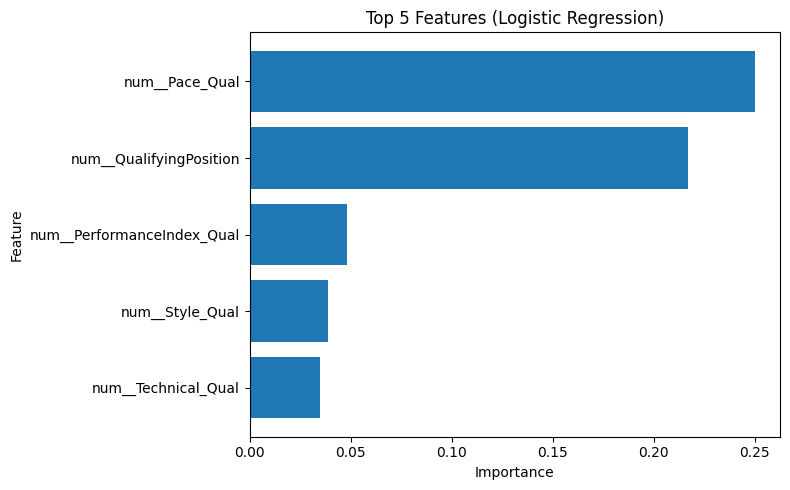

In [31]:

import matplotlib.pyplot as plt
import pandas as pd
import re

# Parse "feature (importance)" pairs from the result string
feature_str = result["Top 10 Features"]

if isinstance(feature_str, str) and feature_str != "N/A":
    # Use regex to extract (feature, importance)
    pattern = r"([\w\-]+)\s*\(([-+]?\d*\.\d+|\d+)\)"
    parsed = re.findall(pattern, feature_str)

    if parsed:
        top_features_df = pd.DataFrame(parsed, columns=["Feature", "Importance"])
        top_features_df["Importance"] = top_features_df["Importance"].astype(float)

        # Select top 5
        top5 = top_features_df.head(5)

        # Plot
        plt.figure(figsize=(8, 5))
        plt.barh(top5["Feature"], top5["Importance"])
        plt.xlabel("Importance")
        plt.ylabel("Feature")
        plt.title("Top 5 Features (Logistic Regression)")
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ Could not parse feature importance string.")
else:
    print("⚠️ No feature importance data available.")


MERGING DATA FOR PLOTTING

In [32]:
data_raw.head()

,Timestamp,driver_code,Consistency_Race,Style_Race,Technical_Race,Pace_Race,PerformanceIndex_Race,Consistency_Qual,Style_Qual,Technical_Qual,...,Finish_pct,Accident_pct,Collision_pct,Damage Related_pct,DNF_pct,Race_Complexity_Score,Safety_Index,mechanical_faults,avg_stops_per_car_race,avg_pitstop_ms
0,11/11/2025 20:10,HAM,0.487,0.870,0.308,0.885,0.637,0.254,0.203,0.403,...,84.416,3.896,11.688,0.000,15.584,0.492,0.352,0.000,1.892,160011.280
1,11/11/2025 20:10,LEC,0.500,0.204,0.574,0.500,0.444,0.000,0.200,0.305,...,84.416,3.896,11.688,0.000,15.584,0.492,0.352,0.000,1.892,160011.280
2,11/11/2025 20:10,NOR,0.664,0.549,0.326,1.000,0.635,0.169,0.500,0.417,...,84.416,3.896,11.688,0.000,15.584,0.492,0.352,0.000,1.892,160011.280
3,11/11/2025 20:10,PIA,0.459,0.382,0.709,0.962,0.628,0.341,0.203,0.190,...,84.416,3.896,11.688,0.000,15.584,0.492,0.352,0.000,1.892,160011.280
4,11/11/2025 20:10,RUS,0.480,0.532,0.403,0.654,0.517,0.464,0.792,0.232,...,84.416,3.896,11.688,0.000,15.584,0.492,0.352,0.000,1.892,160011.280


In [33]:
test_results.head()

,cat__team_Alpine Renault,cat__team_Aston Martin Aramco Mercedes,cat__team_Ferrari,cat__team_McLaren,cat__team_McLaren Mercedes,cat__team_McLaren Renault,cat__team_Mercedes,cat__team_Red Bull Racing,cat__team_Red Bull Racing Honda,cat__team_Red Bull Racing Honda RBPT,...,num__Collision_pct,num__Damage Related_pct,num__DNF_pct,num__Race_Complexity_Score,num__Safety_Index,num__mechanical_faults,num__avg_stops_per_car_race,num__avg_pitstop_ms,Actual,Predicted
73,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,10.784,0.000,13.725,0.415,0.448,0.000,1.892,160011.280,0,1
19,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,4.706,0.000,5.882,0.278,0.664,0.000,1.892,160011.280,0,0
116,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,8.000,0.000,14.400,0.478,0.378,0.000,1.892,160011.280,1,1
67,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,10.417,0.000,11.458,0.369,0.516,0.000,1.892,160011.280,0,0
94,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,8.738,0.000,12.621,0.392,0.481,0.000,1.892,160011.280,1,1


In [34]:
test_results = test_results.rename(columns={
    'num__PerformanceIndex_Qual': 'PerformanceIndex_Qual',
    # 'race_name': 'GrandPrix',
    # 'season': 'Year'
})

final_results = pd.merge(
    test_results,
    data_raw[['PerformanceIndex_Qual','driver_code', 'GrandPrix', 'year','team',"RaceFinishPosition"]],  # keep only relevant keys
    on=['PerformanceIndex_Qual'],
    how='left'   # keeps all rows from test_results
)


final_results.head()


,cat__team_Alpine Renault,cat__team_Aston Martin Aramco Mercedes,cat__team_Ferrari,cat__team_McLaren,cat__team_McLaren Mercedes,cat__team_McLaren Renault,cat__team_Mercedes,cat__team_Red Bull Racing,cat__team_Red Bull Racing Honda,cat__team_Red Bull Racing Honda RBPT,...,num__mechanical_faults,num__avg_stops_per_car_race,num__avg_pitstop_ms,Actual,Predicted,driver_code,GrandPrix,year,team,RaceFinishPosition
0,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.892,160011.280,0,1,PIA,Canadian Grand Prix,2025,McLaren,4.000
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.892,160011.280,0,0,SAI,Chinese Grand Prix,2025,Williams,10.000
2,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,1.892,160011.280,1,1,RUS,Singapore Grand Prix,2025,Mercedes,1.000
3,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,1.892,160011.280,0,0,RUS,Spanish Grand Prix,2025,Mercedes,4.000
4,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.892,160011.280,1,1,PIA,Hungarian Grand Prix,2025,McLaren,2.000


PLOTTING Test Results  
This visualization compares our model's predictions for the 2025 season against the actual race results, based on training data from 2020–2024. We have distinguished between successful predictions and discrepancies to analyze model performance. Notably, the model struggled to accurately forecast outcomes for Verstappen and Leclerc, possibly due to the high variance introduced by their aggressive racing strategies. Conversely, the model successfully captured the performance of George Russell, effectively predicting his results despite their sporadic and fluctuating nature.

In [39]:
# data_results=pd.read_csv(r"C:\Enzo_Files\AIM Data Science\AIM_Sharing\ML1_Final_Project\F1_Model_Results_v2.csv")
# data_results=pd.read_csv(r"C:\Enzo_Files\AIM Data Science\AIM_Sharing\ML1_Final_Project\F1_Model_Results_v3.csv")
data_results=pd.read_csv(r"C:\Enzo_Files\AIM Data Science\AIM_Sharing\ML1_Final_Project\F1_Model_Results_v4.csv")

# data_results_v2 = final_results.copy()
data_results.columns

Index(['cat__team_Alpine Renault', 'cat__team_Aston Martin Aramco Mercedes',
       'cat__team_Ferrari', 'cat__team_McLaren', 'cat__team_McLaren Mercedes',
       'cat__team_McLaren Renault', 'cat__team_Mercedes',
       'cat__team_Red Bull Racing', 'cat__team_Red Bull Racing Honda',
       'cat__team_Red Bull Racing Honda RBPT',
       'cat__team_Red Bull Racing RBPT', 'cat__team_Renault',
       'cat__team_Williams', 'cat__team_Williams Mercedes',
       'cat__team_infrequent_sklearn', 'cat__Direction_Anti-clockwise',
       'cat__Direction_Clockwise', 'num__Consistency_Qual', 'num__Style_Qual',
       'num__Technical_Qual', 'num__Pace_Qual', 'PerformanceIndex_Qual',
       'num__Round', 'num__year', 'num__QualifyingPosition', 'num__Laps',
       'num__Corners', 'num__Circuit length (km)', 'num__Race distance (km)',
       'num__Accident', 'num__Collision', 'num__Damage Related', 'num__Finish',
       'num__Total_Entries', 'num__Finish_pct', 'num__Accident_pct',
       'num__Collisio

In [40]:
data_results_2 = data_results[[
    'PerformanceIndex_Qual',
    'num__Round',
    'num__year',
    'num__QualifyingPosition',
    # 'num__driver_points',
    # 'num__team_points',
    'num__Finish_pct',
    'num__Accident_pct',
    'num__Collision_pct',
    'num__Race_Complexity_Score',
    'num__Safety_Index',
    'Actual',
    'Predicted',
    # 'Predicted_Prob',
    'driver_code',
    'GrandPrix',
    'year',
    'team',
    'RaceFinishPosition'
]]

data_results_2.head()


,PerformanceIndex_Qual,num__Round,num__year,num__QualifyingPosition,num__Finish_pct,num__Accident_pct,num__Collision_pct,num__Race_Complexity_Score,num__Safety_Index,Actual,Predicted,driver_code,GrandPrix,year,team,RaceFinishPosition
0,0.541,10.000,2025.000,3.000,86.275,2.941,10.784,0.415,0.448,0,1,PIA,Canadian Grand Prix,2025,McLaren,4.000
1,0.525,2.000,2025.000,15.000,94.118,1.176,4.706,0.278,0.664,0,0,SAI,Chinese Grand Prix,2025,Williams,10.000
2,0.840,18.000,2025.000,1.000,85.600,6.400,8.000,0.478,0.378,1,1,RUS,Singapore Grand Prix,2025,Mercedes,1.000
3,0.579,9.000,2025.000,4.000,88.542,1.042,10.417,0.369,0.516,0,0,RUS,Spanish Grand Prix,2025,Mercedes,4.000
4,0.663,14.000,2025.000,2.000,87.379,3.883,8.738,0.392,0.481,1,1,PIA,Hungarian Grand Prix,2025,McLaren,2.000


In [41]:
import plotly.graph_objects as go
import numpy as np

# Sort data for chronological order
data_results_2 = data_results_2.sort_values(by='num__Round')

# Add a boolean column for correct predictions
data_results_2['Correct'] = np.where(
    data_results_2['Actual'] == data_results_2['Predicted'], 1, 0
)

# Map colors: green = correct, red = wrong
data_results_2['Color'] = np.where(
    data_results_2['Correct'] == 1, "#18e341", 'red'
)

# Get list of unique drivers
drivers = data_results_2['driver_code'].unique()

# Create figure
fig = go.Figure()

# Add one trace per driver
for driver in drivers:
    driver_data = data_results_2[data_results_2['driver_code'] == driver]
    fig.add_trace(go.Scatter(
        x=driver_data['GrandPrix'],
        y=driver_data['RaceFinishPosition'],
        mode='markers+lines',
        name=driver,
        text=driver_data['RaceFinishPosition'],
        textposition='top center',
        marker=dict(
            size=15,
            color=driver_data['Color'],      # red/green based on correctness
            line=dict(width=1, color='black')
        ),
        hovertemplate=(
            "<b>%{x}</b><br>"
            "Driver: <b>%{customdata[0]}</b><br>"
            "Team: %{customdata[1]}<br>"
            "Round: %{customdata[2]}<br>"
            "Finish: %{y}<br>"
            "Predicted: %{customdata[3]:.3f}<br>"
            "Actual: %{customdata[4]:.3f}<br>"
            "<b>Correct:</b> %{customdata[5]}<br>"
            "Prob: %{customdata[6]:.3f}<extra></extra>"
        ),
        customdata=np.stack([
            driver_data['driver_code'],
            driver_data['team'],
            driver_data['num__Round'],
            driver_data['Predicted'],
            driver_data['Actual'],
            np.where(driver_data['Correct'] == 1, '✅ Yes', '❌ No'),
            # driver_data['Predicted_Prob']
        ], axis=-1)
    ))

# Reverse Y-axis so P1 is on top
fig.update_yaxes(
    autorange='reversed',
    title_text='Race Finish Position'
)

# Set Grand Prix labels on X-axis
fig.update_xaxes(
    title_text='Grand Prix',
    tickangle=45,
    tickmode='array',
    tickvals=data_results_2['GrandPrix'].unique()
)

# Add Podium line (P3)
fig.add_shape(
    type='line',
    x0=-0.5,
    x1=len(data_results_2['GrandPrix'].unique()) - 0.5,
    y0=3,
    y1=3,
    line=dict(color='red', width=3, dash='dash'),
    xref='x',
    yref='y'
)

# Layout styling
fig.update_layout(
    title='🏁 Race Finish Position by Grand Prix (Colored by Prediction Accuracy)',
    template='plotly_white',
    hovermode='closest',
    legend_title_text='Driver',
    title_x=0.5,
    height=700,
)

fig.write_html("F1_Main_graph.html")
fig.show()



COMPARING with Naive Prediction  
We benchmarked our model against a 'Naive Prediction' baseline, which relies solely on Qualifying positions to forecast the winner. Our analysis reveals that the machine learning model performs comparably to this baseline in general metrics but underperforms specifically in predicting 'True Podium' finishes. This suggests that, with the current public data, it is difficult to improve upon the strong correlation between starting grid position and final race result. The model likely hits a 'performance ceiling' that can only be broken with granular, non-public data such as real-time car telemetry, tire degradation rates, and internal team strategies. PCA can also be explored to help distinguish better which data types are more useful than others.

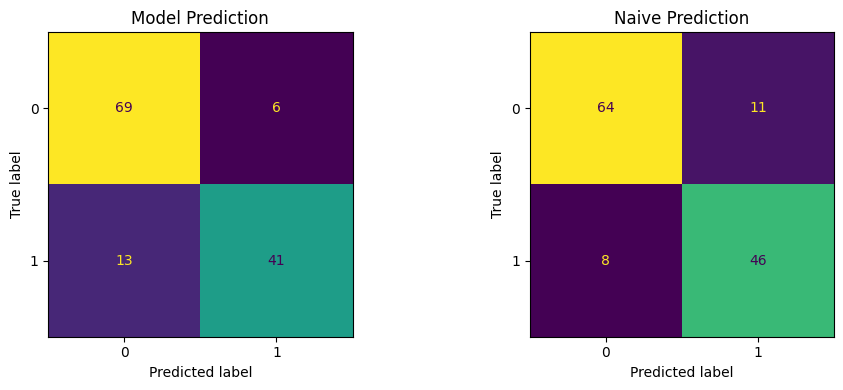

       accuracy  precision  recall    f1
Model     0.853      0.854   0.853 0.851
Rule      0.853      0.855   0.853 0.853


In [42]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt

data_check = data_results_2

# PREDICTION USING QUALIFYING POSITION: 1st, 2nd, 3rd and No Podium ============================
qp = data_check["num__QualifyingPosition"]
# data_check["Qual_prediction"] = qp.where(qp <= 3, 0).astype(int)
data_check["Qual_prediction"] = (qp <= 3).astype(int)

# --- Set up y_true and predictions (multi-class) ---
y_true = pd.to_numeric(data_check["Actual"], errors="coerce").astype(int)

# Model prediction (if probs, convert to class; if already labels, just cast to int)
pred_raw = data_check["Predicted"]
y_model = (pd.to_numeric(pred_raw, errors="coerce").astype(int))

y_rule = pd.to_numeric(data_check["Qual_prediction"], errors="coerce").astype(int)

# Classes present in any of the series
labels = np.sort(np.unique(np.concatenate([y_true.values, y_model.values, y_rule.values])))

# Confusion matrices
cm_model = confusion_matrix(y_true, y_model, labels=labels)
cm_rule  = confusion_matrix(y_true, y_rule,  labels=labels)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ConfusionMatrixDisplay(cm_model, display_labels=labels).plot(ax=axes[0], colorbar=False)
axes[0].set_title("Model Prediction")
ConfusionMatrixDisplay(cm_rule, display_labels=labels).plot(ax=axes[1], colorbar=False)
axes[1].set_title("Naive Prediction")
plt.tight_layout()
plt.show()

# Summary metrics (weighted for multi-class)
summary = pd.DataFrame({
    "accuracy":  [accuracy_score(y_true, y_model), accuracy_score(y_true, y_rule)],
    "precision": [precision_score(y_true, y_model, average="weighted", zero_division=0),
                  precision_score(y_true, y_rule,  average="weighted", zero_division=0)],
    "recall":    [recall_score(y_true, y_model, average="weighted", zero_division=0),
                  recall_score(y_true, y_rule,  average="weighted", zero_division=0)],
    "f1":        [f1_score(y_true, y_model, average="weighted", zero_division=0),
                  f1_score(y_true, y_rule,  average="weighted", zero_division=0)],
}, index=["Model", "Rule"])

print(summary)


In [43]:
data_check.head()

,PerformanceIndex_Qual,num__Round,num__year,num__QualifyingPosition,num__Finish_pct,num__Accident_pct,num__Collision_pct,num__Race_Complexity_Score,num__Safety_Index,Actual,Predicted,driver_code,GrandPrix,year,team,RaceFinishPosition,Correct,Color,Qual_prediction
1,0.525,2.000,2025.000,15.000,94.118,1.176,4.706,0.278,0.664,0,0,SAI,Chinese Grand Prix,2025,Williams,10.000,1,#18e341,0
15,0.578,2.000,2025.000,2.000,94.118,1.176,4.706,0.278,0.664,1,1,RUS,Chinese Grand Prix,2025,Mercedes,3.000,1,#18e341,1
59,0.328,2.000,2025.000,3.000,94.118,1.176,4.706,0.278,0.664,1,0,NOR,Chinese Grand Prix,2025,McLaren,2.000,0,red,1
35,0.462,2.000,2025.000,6.000,94.118,1.176,4.706,0.278,0.664,0,0,LEC,Chinese Grand Prix,2025,Ferrari,18.000,1,#18e341,0
122,0.818,2.000,2025.000,4.000,94.118,1.176,4.706,0.278,0.664,0,0,VER,Chinese Grand Prix,2025,Red Bull Racing,4.000,1,#18e341,0


# CONCLUSION and RECOMMENDATION

Our ML model was trained on 2020–2024 data to predict 2025 F1 winners. The results showed strong overall accuracy but revealed key patterns in driver predictability. Despite having some of the highest Driver Performance Index scores, Leclerc and Verstappen emerged as the most difficult to predict, producing the widest variance in model confidence. In contrast, the model performed exceptionally well with Piastri and Norris, missing only two predictions each, while Russell served as a good stress test for capturing more erratic race outcomes, with only three misclassifications. 

To strengthen the model further, the next recommended actions include expanding the driver set to evaluate performance on lower-probability podium contenders and enhancing the output granularity by improving prediction precision from binary podium prediction to ordinal ranking (1st, 2nd, 3rd, etc.), enabling more strategic and race-specific insights.